==============================================================================================
# Practicum 5 - Part 2

==============================================================================================

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P5_Student1_Student2.zip** that includes:
    - The notebook P5_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Group A- Group F): November 30th, 23:00 h**

**Deadline (Group B): November 1st, 23:00 h**

==============================================================================================
##  Image search using textures
==============================================================================================

#### Problem we want to solve
- Given a query image **$x$** and a set of images **$X$** we would like to retreive the most similar to **$x$** images from  **$X$**.

The exercises of this notebook will show how we can perform image similarity search using:

**Part 1:**

- Gaussian filters
- Descriptors based on texture 

**Part 2:**

- Distance between images and similarity search

### Imports

In [2]:
%matplotlib inline

import time
import scipy
import numpy as np
import skimage
from skimage import filters
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import resize
from scipy.ndimage import convolve

import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import joblib  ## 

# 1 Import previous functions



## Leung-Malik (LM) Filter Bank
We can apply a collection of multiple filters that we call a filter bank. Note that if we apply $D$ filters our feature vectors will be $D$ dimensional.

The following image shows a filter bank. In the filter bank we typically want filters to capture a combination of scales, orientations of different types of patterns. This particular filter bank is The Leung-Malik (LM) Filter Bank.

<img src="./images_notebook/filter_bank.png">

We import Leung-Malik filters as follows:

In [3]:
import LM_filters

LM filters imported, the shape of the filter bank is:  (49, 49, 48)


In [4]:
filter_bank = LM_filters.makeLMfilters()
filter_bank.shape

(49, 49, 48)

### Plotting all filters

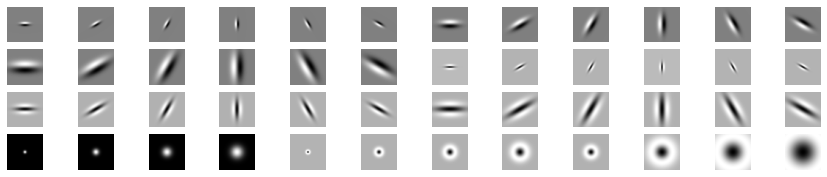

In [5]:
n_filters = filter_bank.shape[-1]

fig, ax = plt.subplots(ncols=12, nrows=4, figsize=(15,3))

k = 0
for i in range(4):
    for j in range(12):
        ax[i,j].imshow(filter_bank[:,:,k], cmap = 'gray')
        ax[i,j].axis("off")
        k = k + 1

## Import functions

We need to use `extract_features()` and  `get_dataset_features()` from **Practicum 5 - Part 1**.

On the one hand, function `extract_features(image, filter_bank, n_filters)` returns a feature vector of shape `n_filters`, from the filter bank, using a  single image `image`

$$
\text{feat}(x) = \left( \text{mean}( |r_1|), \dots,\text{mean}(|r_D|) \right)
$$


In [6]:
def extract_features(image, filter_bank, n_filters):
    features = np.zeros(n_filters)
   
   ## Complete this function
    image_gray = rgb2gray(image) #we make the image grayscale so the shape is the same as the filter of the filter bank
      
    images = []
    filters = []
    for i in range(n_filters):
        #at position  i  the mean of the absolute value of the convolved image by filter  i.
        features[i] = np.mean(np.abs(convolve(image_gray, filter_bank[:,:,i])))
        
    return features

On the other hand, function `get_dataset_features(all_images, filter_bank)`, that applies `extract_features()`, returns a matrix containing the feature vectors for all the images in a dataset.

In [7]:
def get_dataset_features(all_images,  filter_bank, n_filters):
    
    n_images = len(all_images) #the number of images
    #n_filters = filter_bank.shape[-1] #this we can remove
    feature_vectors=np.zeros((n_images,n_filters))
    
    ## Complete this function
    
    for i in range(n_images):
        feature_vectors[i] = extract_features(all_images[i], filter_bank, n_filters)
        
    return feature_vectors

**Hint: Please, check all the functions are well working before continuing!!!**

## Load & resize the dataset

**3.1** Similarly to **Practicum 5 - Part 1**, read all the images in the directories, **resized them to 250x250 pixels** and save the image in an array:

<ul>
    <li>./images/pizza/</li>
    <li>./images/flowers/</li>
    <li>./images/pets/</li>
</ul>


In [8]:
# Your solution here
"""
we can use list comprehension to do this, by calling the function resize with the parameter of the read image and the size
for each iteration until we go trhough the entire folder, appending the resized image to the new list.
"""
pizza_images = [resize(skimage.io.imread('./images/pizza/' + i), (250, 250)) for i in os.listdir('./images/pizza/')]
flowers_images = [resize(skimage.io.imread('./images/flowers/' + i), (250, 250)) for i in os.listdir('./images/flowers/')]
pets_images = [resize(skimage.io.imread('./images/pets/' + i), (250, 250)) for i in os.listdir('./images/pets/')]

In [9]:
## Try the function
all_images = pizza_images + flowers_images + pets_images
feature_vectors=get_dataset_features(all_images,  filter_bank, n_filters=filter_bank.shape[2])


# 2 Retrieving the most similar images


## Similarity search

Let us assume $f(x) \in \mathbb{R}^D$ represents a set of features for $x$. Given a query image $x$ and another image $x^m$ from the database, we can compute the distance between images as
$$
\text{distance}\left( f(x) , \, f(x^m) \right) = \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 =  \sqrt{ \sum_{d=1}^\text{D} \left( f(x)_d - f(x^m)_d  \right)^2 }
$$

then we can find the closest image $x^{m^*}$ from the database to $x$ as $m^* =  \text{argmin}_{m} \{ \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 \}$




**3.2** Implement a function `retrieve_images(im, all_images, filter_bank, k=5)` to retrieve and visualize the `k` most similar images (according to the l2 norm) to `im` and the corresponding distances.

The input of this function need to be the images of interest `im`, the whole data set `all_images`, the filter bank and an integer value `k`, which defines the number of images to be shown.

The function should return the ordered vector of distances.

<img src="./images/indice.png" >


In [10]:
def retrieve_images(im, all_images, filter_bank, k=5):   
    distances = []
    closest = []
    img_features = extract_features(im, filter_bank, n_filters) #extract features of image
    ## Complete this function
    #a list to save all the distances
    output = []        
    for i in range(len(feature_vectors)):
        similarity = np.linalg.norm(img_features - feature_vectors[i])
        output.append([similarity, i]) #save distance and index

    output.sort(reverse = False)
    
    for i in range(k):
        closest.append(all_images[output[i][1]]) #index
        distances.append(output[i][0]) #distance

    return closest, distances

Try your function using ``/images/pizza.jpg``.

In [12]:
# Try your function
pizza = imread('./images/pizza.jpg')
pizza = resize(pizza, (250,250))
closest, distances = retrieve_images( pizza, all_images, filter_bank, k=5)

Plot the ordered distance vector

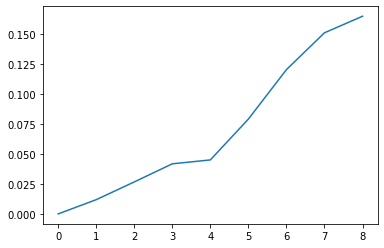

In [24]:
plt.plot(distances)

In [13]:
# Your solution here
#visualize
def display(images, distances):
    
    fig = plt.figure(figsize=(15,15))
    
    for i in range(len(images)):
        fig.add_subplot(3,3,i+1)
        plt.title('Distance: ' + str(distances[i]))
        plt.imshow(images[i], cmap='gray')
        
    plt.show()

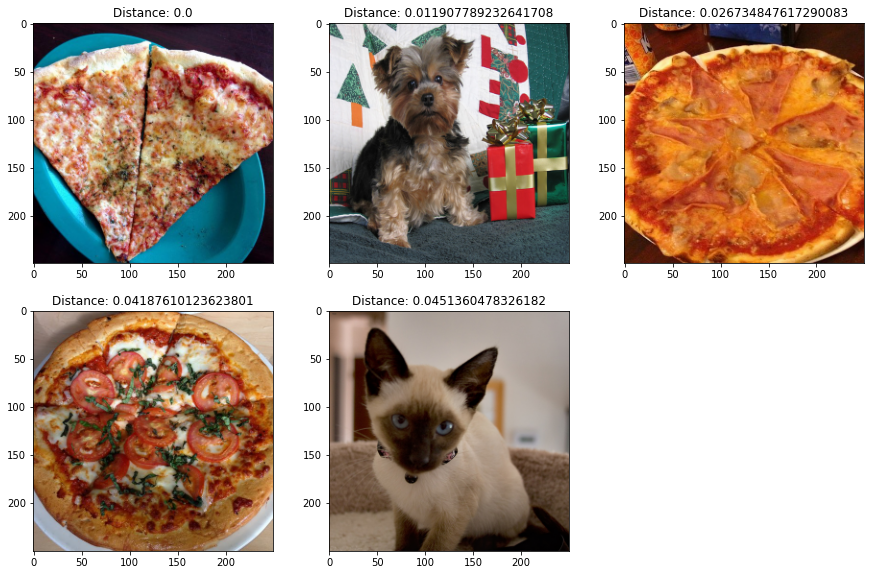

In [14]:
display(closest, distances)

**3.3** Try your function using a different number of closest images `k`.

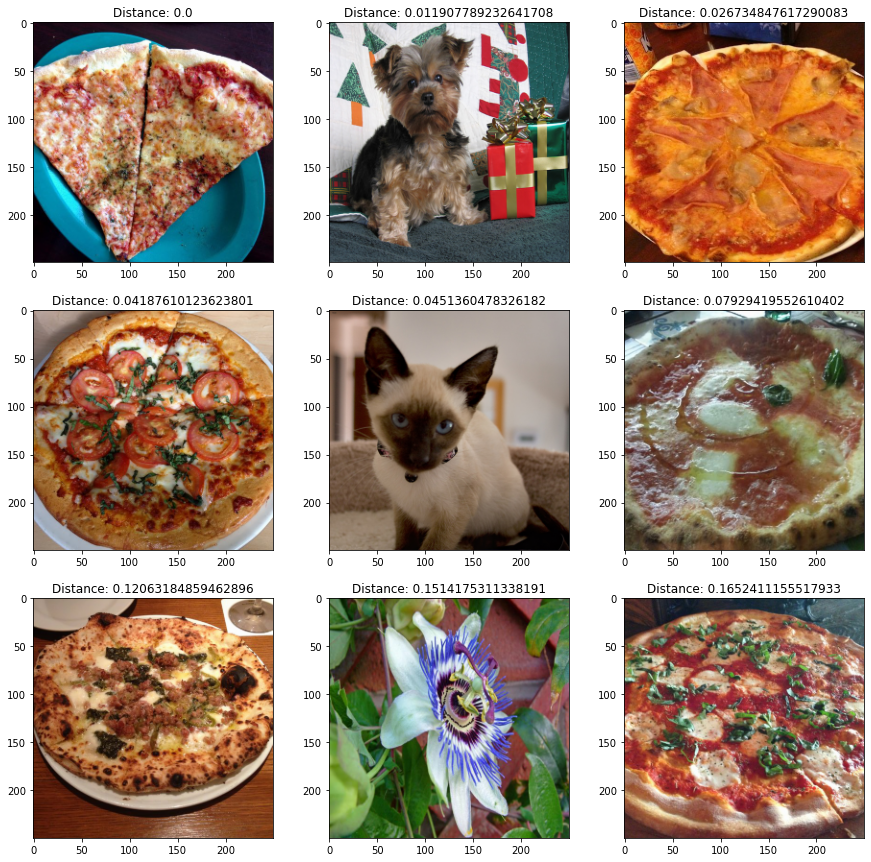

In [16]:
# Your solution here
closest, distances = retrieve_images( pizza, all_images, filter_bank, k=9)
display(closest, distances)

**3.4** (Optional) Try your function using ``/images/dog.jpg``, and ``/images/flower.jpg``

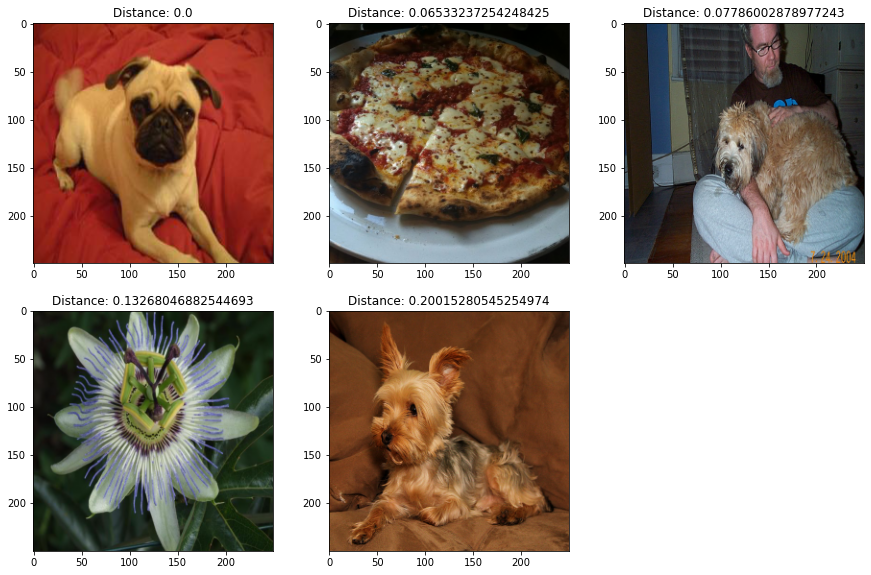

In [17]:
# Your solution here
dog = imread('./images/dog.jpg')
dog = resize(dog, (250,250))
closest2, distances2 = retrieve_images( dog, all_images, filter_bank, k=5)
display(closest2, distances2)

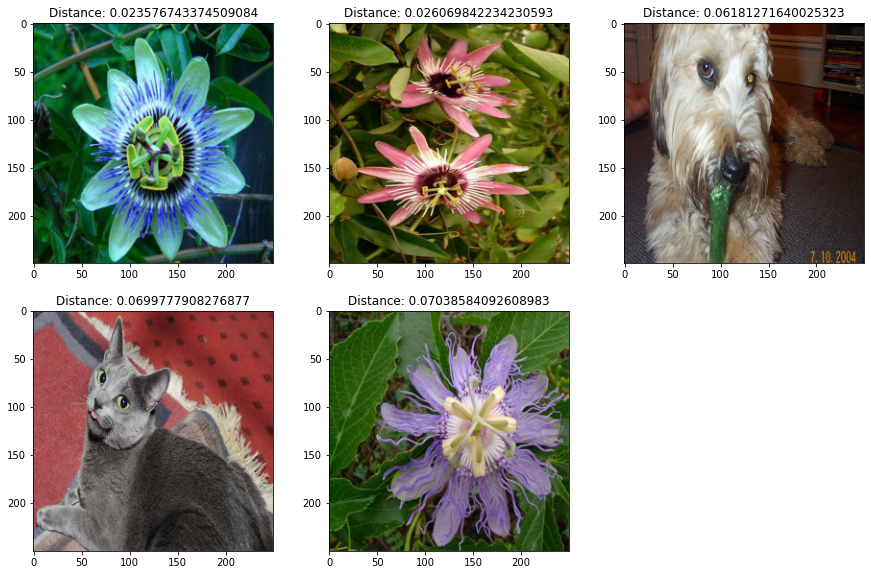

In [23]:
flower = imread('./images/flower.jpg')
flower = resize(flower, (250,250))
closest3, distances3 = retrieve_images( flower, all_images, filter_bank, k=5)
display(closest3, distances3)

In [ ]:
#the original image of flower is not on the dataset, so it wont give you the same image as the closest one

## Compute the accuracy of the algorithm: given a query image. 

**3.5** Implement a function `accuracy(feature_vectors, class_labels, im_features, class_im,  k=5)`, which takes as input `feature_vectors`, the `class_labels` for the images (`0 = pizza`, `1 = flower` and `2 = pet`), the number of images to retrieve `k`, a query image (i.e. the feature vector for the image of interest) and the class of the query image `class_im`. 

Returns as output the number of retrieved images that belong to class `class_im` divided by the total of images retrieved `k` (this is the accuracy).

**Hint**: Be careful to exclude the query image from the retrieved images (i.e. those cases in which `distance=0.0`)

In [25]:
class_labels = np.concatenate((np.zeros(30), np.ones(30),  2*np.ones(30))).reshape(90,1)

In [26]:
def retrieve_images2(im, all_images, filter_bank, feature_vectors, k=5): 
    """
    we made a slight modification, this time we already get the image's features, so we dont need to extract it
    Also, we only need the image index, not the image from all images
    """
    distances = []
    closest = []
    #so we changed it here
    img_features = im #in this case we already have the features
    ## Complete this function
    #a list to save all the distances
    output = []        
    for i in range(len(feature_vectors)):
        similarity = np.linalg.norm(img_features - feature_vectors[i])
        output.append([similarity, i]) #save distance and index

    output.sort(reverse = False)
    
    for i in range(k):
        #and we changed it here
        closest.append(output[i][1]) #index
        distances.append(output[i][0]) #distance

    return closest, distances

In [27]:
def accuracy(feature_vectors, class_labels, im_features, class_im, k=5):
    
    ## Complete this function
    #we call a modified version of retrieve_images
    closest, distances = retrieve_images2( im_features, all_images, filter_bank, feature_vectors, k)
    
    matches = 0 #to count how many matches we have
    for i in range(k):        
        #we get the index of the closest image, so we can get the class
        index = closest[i]        
     
        #if the class of the retrieved image is the same as the class of the input image
        if class_labels[index] == class_im:            
            matches += 1 #increase count
            
    acc = matches / k #get the proportion
    return acc


In [28]:
# Try your function
im_features = extract_features(pizza, filter_bank, n_filters)

In [54]:
print("acc: ", accuracy(feature_vectors, class_labels, im_features, class_labels[10], 5))

acc:  0.6


Compute the accuracy with k=10 with the previous images. Does the accuracy match the images retrieved from the previous exercise?

In [30]:
# Your solution here
print("acc: ", accuracy(feature_vectors, class_labels, im_features, class_labels[10], 10))
"""
yes, the accuracy remains the same
"""

acc:  0.6


'\nyes, the accuracy remains the same\n'

**3.6** Modify (if necessary) functions `extract_features()` and `get_dataset_features()` in order to use only a given number of filters. Compute the accuracy using `n_filters=6`, `n_filters=18` and `n_filters=36`. 

Comment the results.

In [31]:
# Your solution here
im_features_6 = extract_features(pizza, filter_bank, 6)
im_features_18 = extract_features(pizza, filter_bank, 18)
im_features_36 = extract_features(pizza, filter_bank, 36)

In [42]:
feature_vectors_6= feature_vectors[:,:6] #we already have the feature vector, so we just chunk it
print("acc with 6: ", accuracy(feature_vectors_6, class_labels, im_features_6, class_labels[10], 10))

feature_vectors_18= feature_vectors[:,:18]
print("acc with 18: ", accuracy(feature_vectors_18, class_labels, im_features_18, class_labels[10], 10))

feature_vectors_36= feature_vectors[:,:36]
print("acc with 36: ", accuracy(feature_vectors_36, class_labels, im_features_36, class_labels[10], 10))

acc with 6:  0.5
acc with 18:  0.5
acc with 36:  0.5


**3.7** (Optional) Try your function using other images and modifying the number of filters to be used.

**Hint:** You can use `im_features = feature_vectors[j]` and `class_im = class_labels[j]`, for a given `j` value, in order to simplify the problem, instead of recomputing the features for a new image. **Remember** to exclude the query image from the retrieved images!.

In [41]:
# Your solution here
dog_features_6 = extract_features(dog, filter_bank, 6)
dog_features_18 = extract_features(dog, filter_bank, 18)
dog_features_36 = extract_features(dog, filter_bank, 36)

In [33]:
#we use class_labels[70] cause its 2. which corresponds with the dog class

In [47]:
feature_vectors_6= feature_vectors[:,:6] 
print("acc with 6: ", accuracy(feature_vectors_6, class_labels, dog_features_6, class_labels[70], 10))

feature_vectors_18= feature_vectors[:,:18]
print("acc with 18: ", accuracy(feature_vectors_18, class_labels, dog_features_18, class_labels[70], 10))

feature_vectors_36= feature_vectors[:,:36]
print("acc with 36: ", accuracy(feature_vectors_36, class_labels, dog_features_36, class_labels[70], 10))

acc with 6:  0.8
acc with 18:  0.9
acc with 36:  0.9


In [48]:
flower_features_6 = extract_features(flower, filter_bank, 6)
flower_features_18 = extract_features(flower, filter_bank, 18)
flower_features_36 = extract_features(flower, filter_bank, 36)

In [ ]:
#we use class_labels[30] cause its 1. which corresponds with the flower class

In [49]:
feature_vectors_6= feature_vectors[:,:6] 
print("acc with 6: ", accuracy(feature_vectors_6, class_labels, flower_features_6, class_labels[30], 10))

feature_vectors_18= feature_vectors[:,:18]
print("acc with 18: ", accuracy(feature_vectors_18, class_labels, flower_features_18, class_labels[30], 10))

feature_vectors_36= feature_vectors[:,:36]
print("acc with 36: ", accuracy(feature_vectors_36, class_labels, flower_features_36, class_labels[30], 10))

acc with 6:  0.9
acc with 18:  0.8
acc with 36:  0.8


# 3 Image retrieval based on texture and color. 

**3.8** Make a function ` lm_features_rgb`  that returns the features based on a color descriptor. 

**Hint:** How will you define it? What should be the dimensonality of the new descriptor?.


In [50]:
def lm_features_rgb(image, filter_bank, n_filters = filter_bank.shape[-1] ):
    """
    Since our filters previusly had 48, now that we have 3 components, it should be 48 * 3, 48 for each channel
    """
    ## Complete this function
    features_for_im = np.zeros(n_filters * 3) #so we can store all of the values
    
    #we extract the features for each channel of the image
    r = extract_features(image[:,:,0], filter_bank, n_filters) 
    g = extract_features(image[:,:,1], filter_bank, n_filters)
    b = extract_features(image[:,:,2], filter_bank, n_filters)
    
    #we concatenate them all and save it 
    features_for_im = np.concatenate((r, g, b))

    return features_for_im

In [52]:
# Try your function
lm_rgb_features = lm_features_rgb(pizza, filter_bank, n_filters)


## Apply the function to all the images in the dataset

**3.9** Using ` lm_features_rgb` build the features of all the datapoints in and save them in `X_lm_rgb`.

**Hint:** You can parallelize the feature building process using `joblib.Parallel`. This will make the computation much faster if you have a processor with more than two threads.

In [74]:
import joblib

In [53]:
# Your solution here
def rgb_get_dataset_features(all_images,  filter_bank, n_filters):
    
    n_images = len(all_images) #the number of images
    rgb_feature_vectors=np.zeros((n_images, n_filters * 3))#remember we are doing it for three channels now
    
    ## Complete this function
    for i in range(n_images):
        rgb_feature_vectors[i] = lm_features_rgb(all_images[i], filter_bank, n_filters)
    
    return rgb_feature_vectors

In [54]:
X_lm_rgb = rgb_get_dataset_features(all_images,  filter_bank, n_filters)

In [ ]:
import joblib
X_lm_rgb = joblib.Parallel(n_jobs=8)(joblib.delayed(lm_features_rgb)(im) for im in all_images)

## Compute the accuracy of the method using lm rgb features

**3.10** Compute the accuracy of the retrieved images using the features that contain color information. Make a plot of the 4 closest images to the query images in the `lm_rgb` space.

Is the accuracy higher? Please, comment the results.

In [66]:
def retrieve_images3(im, all_images, filter_bank, feature_vectors, k=5): 
    """
    I added this function again, its the same as the retrieve_images2 but instead of returning the index, it returns 
    the actual image, I added it to avoid compiling previous code again
    """
    distances = []
    closest = []
    #so we changed it here
    img_features = im #in this case we already have the features
    ## Complete this function
    #a list to save all the distances
    output = []        
    for i in range(len(feature_vectors)):
        similarity = np.linalg.norm(img_features - feature_vectors[i])
        output.append([similarity, i]) #save distance and index

    output.sort(reverse = False)
    
    for i in range(k):
        #and we changed it here
        closest.append(all_images[output[i][1]]) #image
        distances.append(output[i][0]) #distance

    return closest, distances

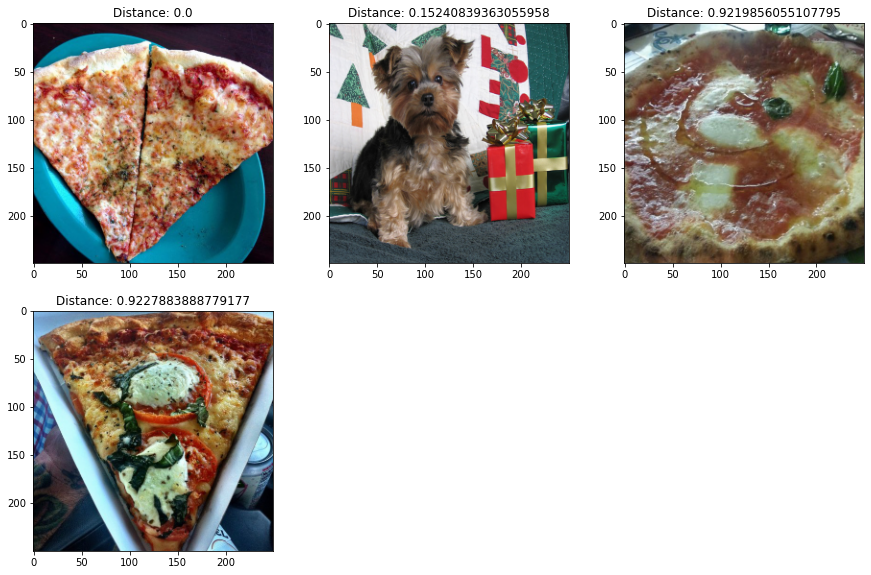

acc:  0.6


In [69]:
# Your solution here
closest, distances = retrieve_images3(lm_rgb_features, all_images, filter_bank, X_lm_rgb, 4)
display(closest, distances)
print("acc: ", accuracy(X_lm_rgb, class_labels, lm_rgb_features, class_labels[10], 5))

In [ ]:
"""
If we use the same K value, yes the accuracy will be better, but only because we are doing less images, if we print the closest 
4, and calculate the accuracy of k = 5 images, teh accuracy reamins the same, so technically the accuracy doesn't improve
"""

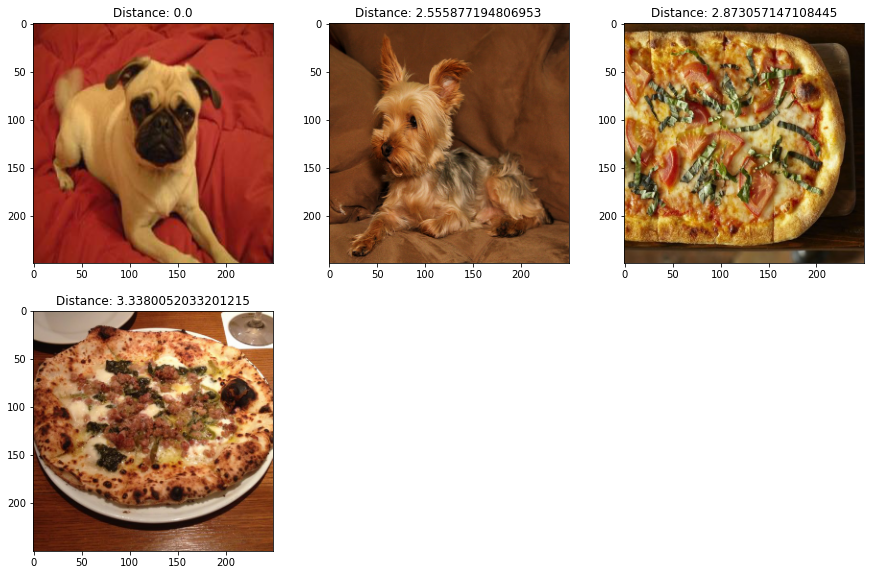

acc:  0.6


In [71]:
dog_lm_rgb_features = lm_features_rgb(dog, filter_bank, n_filters)
closest, distances = retrieve_images3(dog_lm_rgb_features, all_images, filter_bank, X_lm_rgb, 4)
display(closest, distances)
print("acc: ", accuracy(X_lm_rgb, class_labels, dog_lm_rgb_features, class_labels[10], 5))

## Compare the accuracy of the method using a) texture, b) color and c) texture + color  features

**3.10** Compute the accuracy of the retrieved images using the features that contain color information. Make a plot of the 4 closest images to the query images in the `lm_rgb` space.

Is the accuracy higher? Please, comment the results.

In [ ]:
# Your solution here
"""
this is the previus one
"""


**3.11** Compute the accuracy of the retrieved images using the features that contain texture and color information. Make a plot of the 4 closest images to the query images in the `lm_rgb_texture` space.

Is the accuracy higher? Please, comment the results.

In [81]:
# Your solution here
image_features = extract_features(pizza, filter_bank, n_filters)
image_features_rgb = lm_features_rgb(pizza, filter_bank, n_filters)
lm_rgb_texture =  np.concatenate((image_features, image_features_rgb)) #we combine the features using texture and color

data_set_features = np.concatenate((feature_vectors, X_lm_rgb), axis =1)#we do the same for the all data set

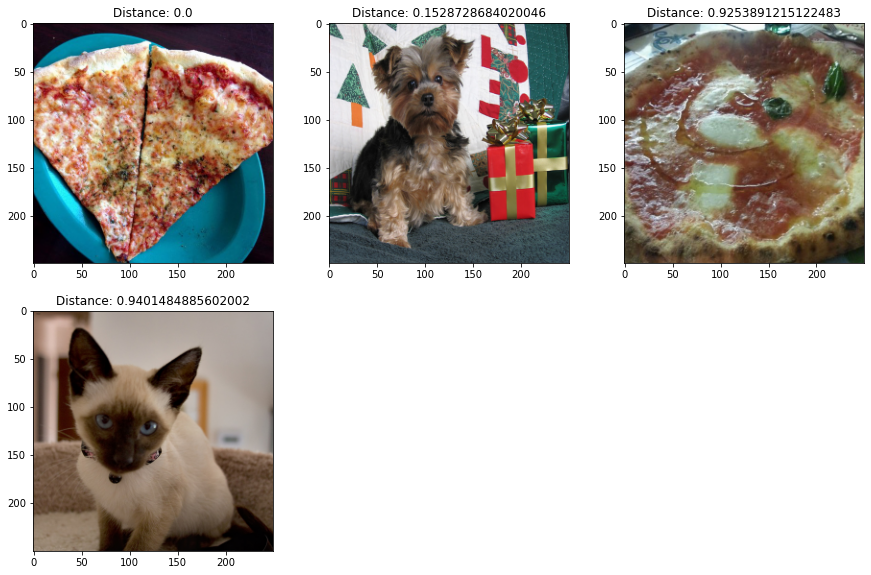

acc:  0.4


In [90]:
closest, distances = retrieve_images3(lm_rgb_texture, all_images, filter_bank, data_set_features, 4)
display(closest, distances)
print("acc: ", accuracy(data_set_features, class_labels, lm_rgb_texture, class_labels[10], 5))

In [ ]:
"""
The accuracy is slighly lower, probably because there is
"""